In [1]:
import pandas as pd

In [89]:
train = pd.read_csv('data/train.csv')

In [90]:
test = pd.read_csv('data/test.csv')

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
train.shape

(891, 12)

In [10]:
test.shape

(418, 11)

In [11]:
test.keys()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
import missingno as msno

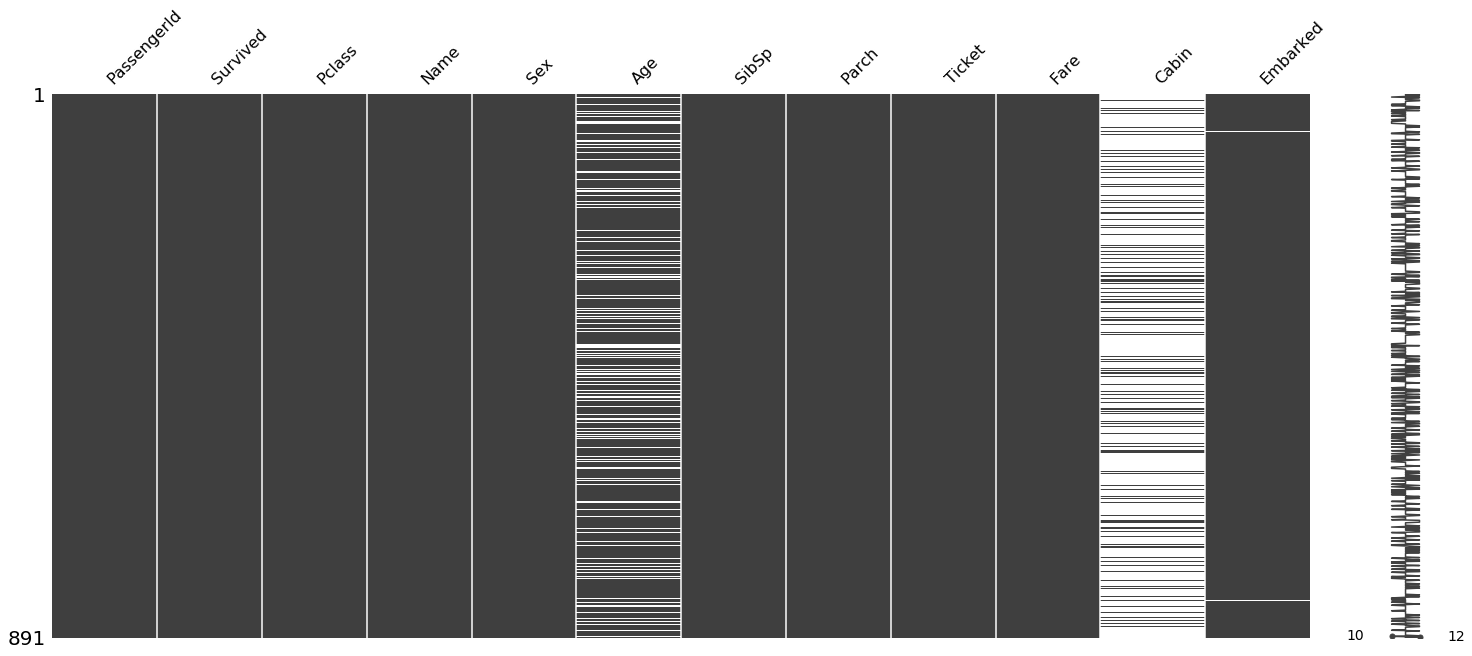

In [13]:
msno.matrix(train)

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 데이터 시각화부분

* seaborn 사용

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [18]:
"""
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
"""

"\ndef bar_chart(feature):\n    survived = train[train['Survived']==1][feature].value_counts()\n    dead = train[train['Survived']==0][feature].value_counts()\n    df = pd.DataFrame([survived,dead])\n    df.index = ['Survived','Dead']\n    df.plot(kind='bar',stacked=True, figsize=(10,5))\n"

In [34]:
#같은 내용을 그래프로 확인해야 하니 함수로 만듬
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

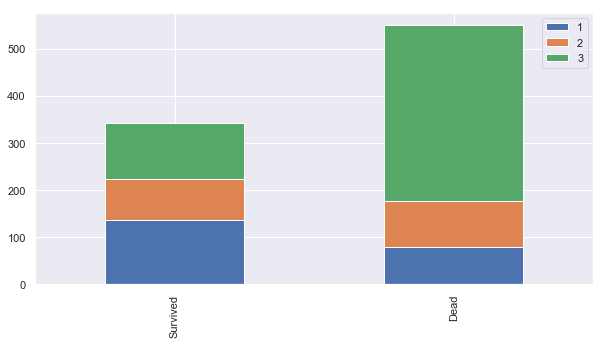

In [35]:
bar_chart('Pclass')

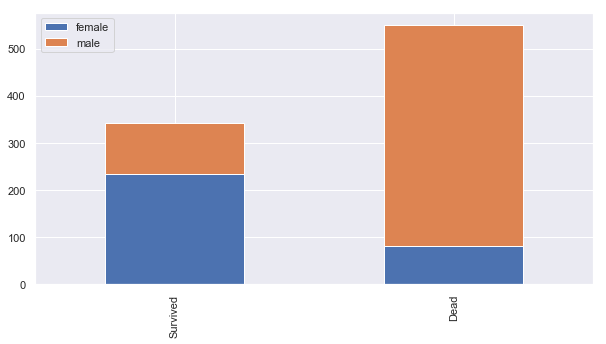

In [36]:
bar_chart('Sex')

In [37]:
train.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

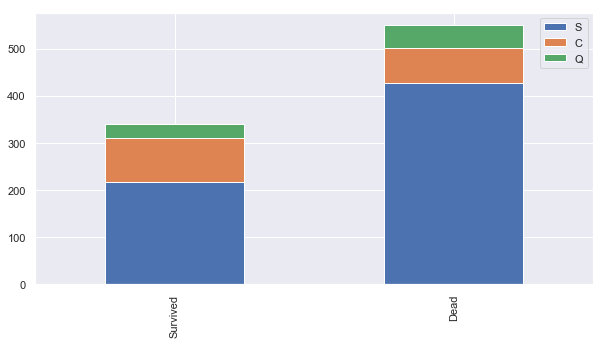

In [38]:
bar_chart('Embarked')

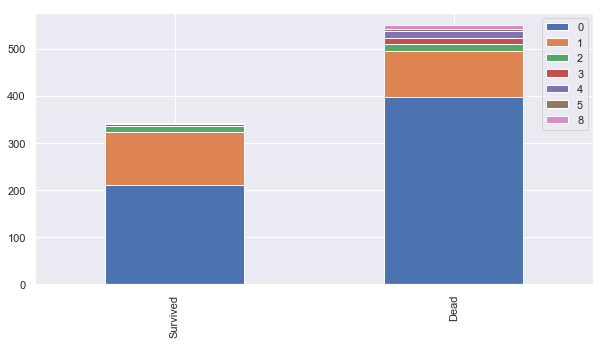

In [39]:
bar_chart('SibSp')

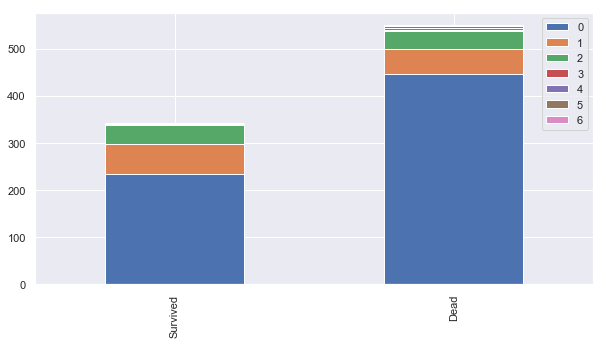

In [40]:
bar_chart('Parch')

## feature Engineering

In [41]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [91]:
train_test_data = [train, test] #combining train and test dateset, 한번에 train과 test를 변경하여 적용

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False) #Mr, Ms, Miss등 정보 추출

In [44]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Ms            1
Don           1
Jonkheer      1
Mme           1
Countess      1
Capt          1
Lady          1
Sir           1
Name: Title, dtype: int64

In [45]:

title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [92]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


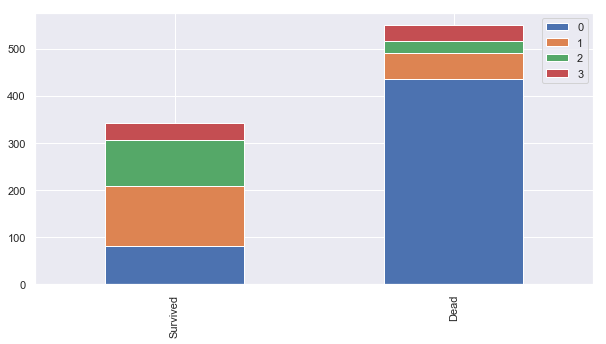

In [47]:
bar_chart('Title')

In [93]:
train['Name'] = train.drop('Name', axis=1)
test['Name'] = test.drop('Name', axis=1)


In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,2,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,4,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,5,male,35.0,0,0,373450,8.0500,NaN,S,0


In [94]:
sex_mapping = {'male':0, 'female':1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,2,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,4,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,5,0,35.0,0,0,373450,8.0500,NaN,S,0


In [56]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,892,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,893,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,894,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,895,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,896,1,22.0,1,1,3101298,12.2875,NaN,S,2


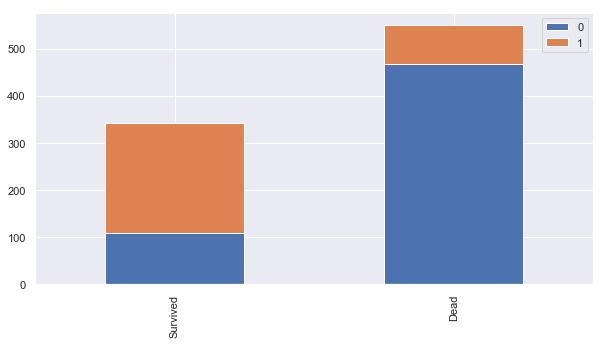

In [57]:
bar_chart('Sex')

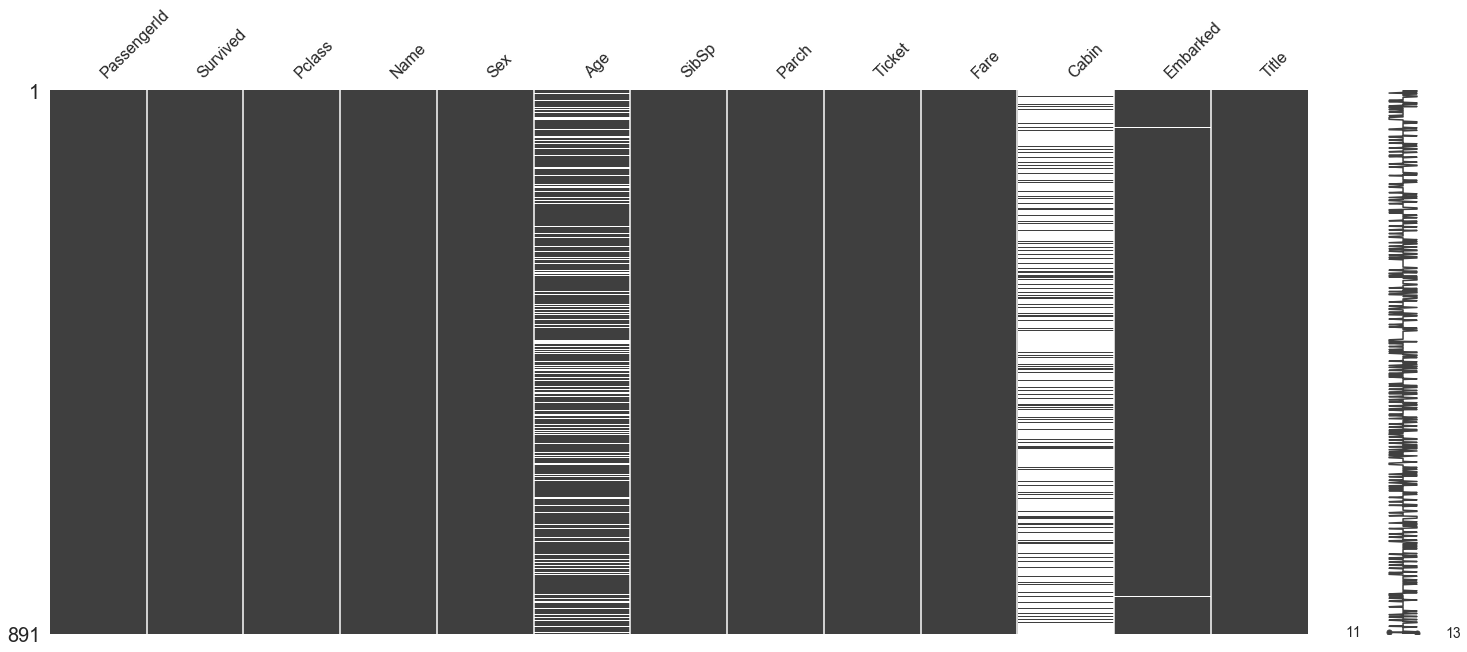

In [95]:
msno.matrix(train)

In [60]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

## Age의 평균나이를 일괄 적용이 아닌, 결혼, 남, 여 등의 기준으로 평균을 내어 해당 평균 값을 적용

In [96]:
train['Age'] = train['Age'].fillna(train.groupby('Title')['Age'].transform('median'))
test['Age'] = test['Age'].fillna(train.groupby('Title')['Age'].transform('median'))

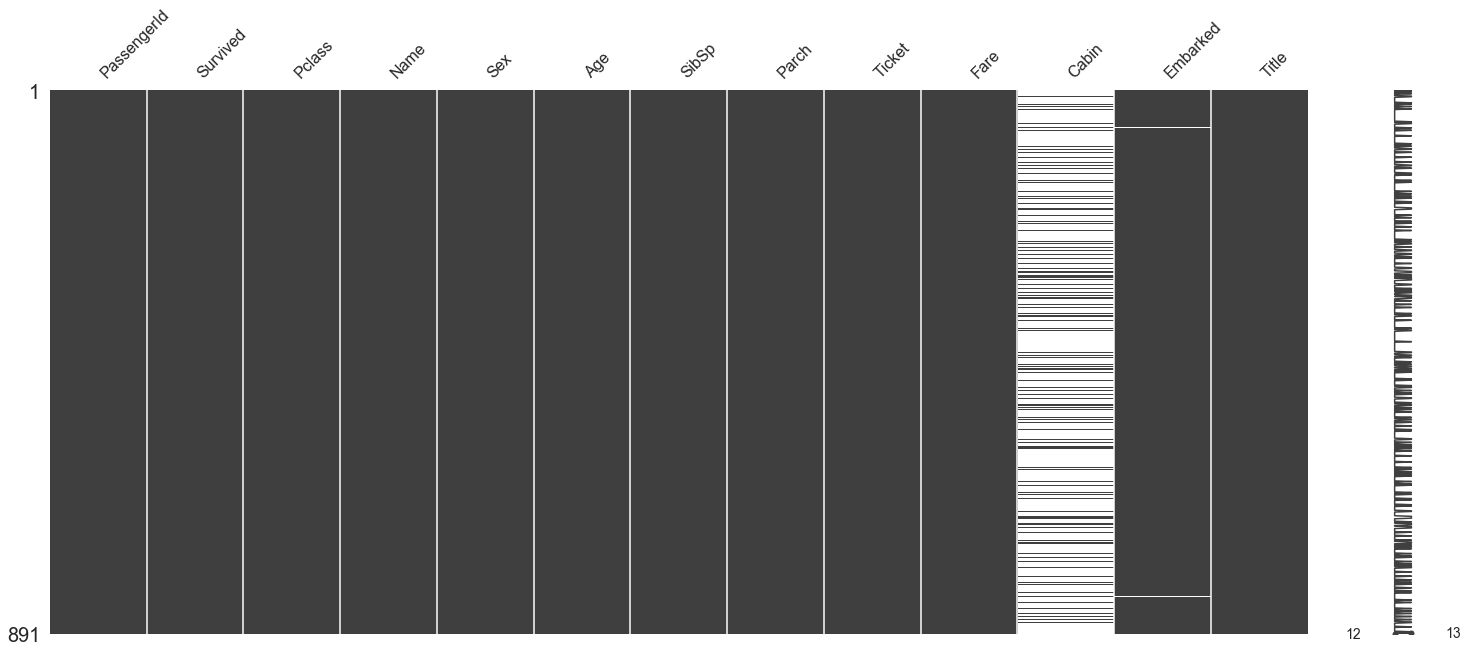

In [97]:
msno.matrix(train)

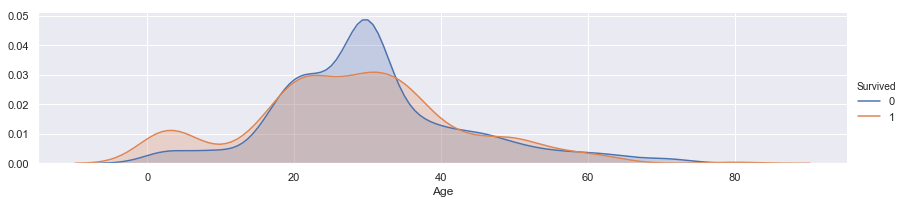

In [98]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.add_legend()

In [99]:
#나이를 구간으로 표현
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [101]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,0,1.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,2,1,3.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,4,1,2.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,5,0,2.0,0,0,373450,8.0500,NaN,S,Mr


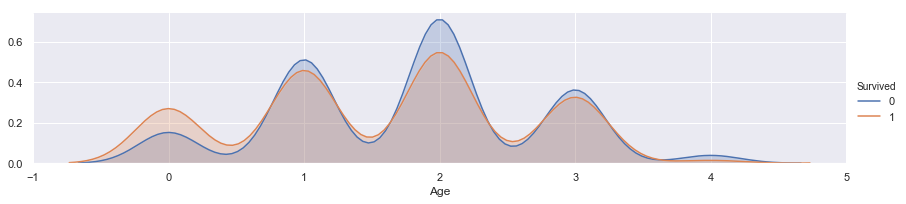

In [100]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.add_legend()

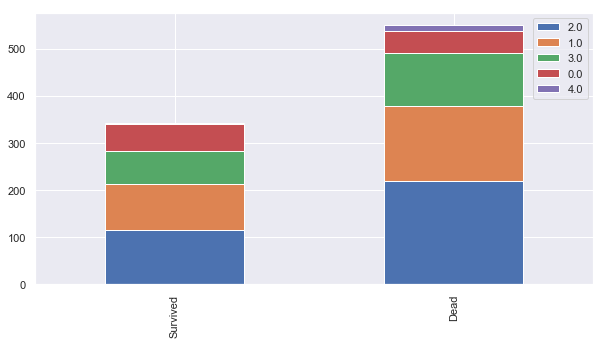

In [102]:
bar_chart('Age')

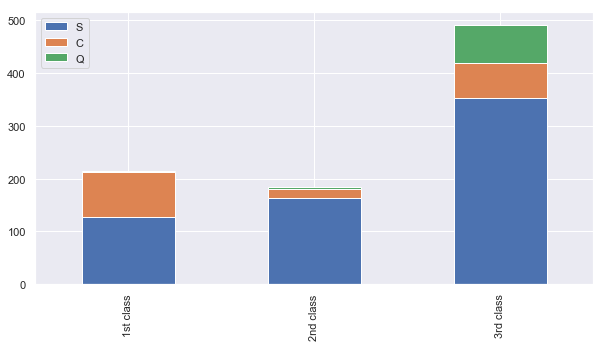

In [105]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5)) 

In [106]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [107]:
# 배를 탄 항구도 문자에서 숫자로 변경
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [108]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,0,1.0,1,0,A/5 21171,7.2500,NaN,0,Mr
1,2,1,1,2,1,3.0,1,0,PC 17599,71.2833,C85,1,Mrs
2,3,1,3,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Miss
3,4,1,1,4,1,2.0,1,0,113803,53.1000,C123,0,Mrs
4,5,0,3,5,0,2.0,0,0,373450,8.0500,NaN,0,Mr


In [111]:
#티켓가격 중간값
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,0,1.0,1,0,A/5 21171,7.2500,NaN,0,Mr
1,2,1,1,2,1,3.0,1,0,PC 17599,71.2833,C85,1,Mrs
2,3,1,3,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Miss
3,4,1,1,4,1,2.0,1,0,113803,53.1000,C123,0,Mrs
4,5,0,3,5,0,2.0,0,0,373450,8.0500,NaN,0,Mr
5,6,0,3,6,0,2.0,0,0,330877,8.4583,NaN,2,Mr
6,7,0,1,7,0,3.0,0,0,17463,51.8625,E46,0,Mr
7,8,0,3,8,0,0.0,3,1,349909,21.0750,NaN,0,Master
8,9,1,3,9,1,2.0,0,2,347742,11.1333,NaN,0,Mrs
9,10,1,2,10,1,0.0,1,0,237736,30.0708,NaN,1,Mrs


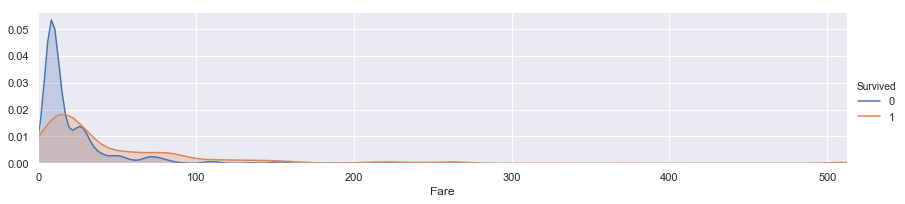

In [110]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

In [112]:
train['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
E101           3
F2             3
D              3
F33            3
E67            2
F4             2
C123           2
B49            2
D35            2
B51 B53 B55    2
B22            2
E25            2
B20            2
C68            2
B58 B60        2
D20            2
D26            2
C2             2
D33            2
D36            2
C52            2
C93            2
D17            2
B77            2
C65            2
C78            2
              ..
C85            1
C30            1
E12            1
E46            1
C101           1
E50            1
F E69          1
D45            1
E49            1
E40            1
E68            1
E36            1
C45            1
B19            1
C7             1
D56            1
A6             1
D30            1
E77            1
B3             1
A31            1
D28            1
A24            1
D10 D12        1
B38            1
B94            1
B39            1
B102          

In [113]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [114]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [115]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,0,1.0,1,0,A/5 21171,7.2500,NaN,0,Mr
1,2,1,1,2,1,3.0,1,0,PC 17599,71.2833,C,1,Mrs
2,3,1,3,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Miss
3,4,1,1,4,1,2.0,1,0,113803,53.1000,C,0,Mrs
4,5,0,3,5,0,2.0,0,0,373450,8.0500,NaN,0,Mr


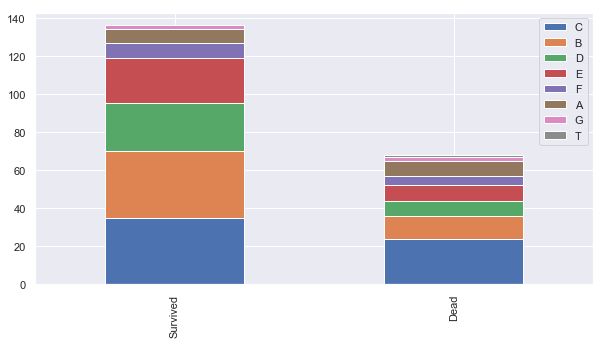

In [116]:
bar_chart('Cabin')

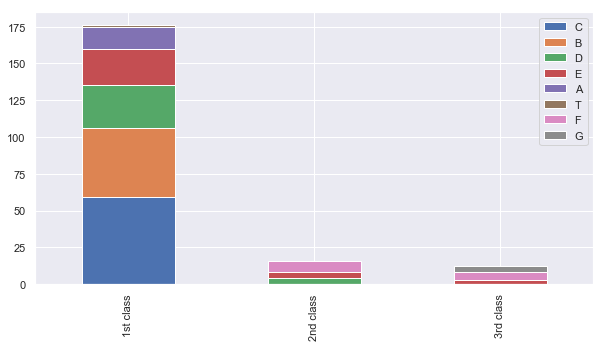

In [117]:
#클래스별 짐 매핑
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [118]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [119]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,0,1.0,1,0,A/5 21171,7.2500,NaN,0,Mr
1,2,1,1,2,1,3.0,1,0,PC 17599,71.2833,0.8,1,Mrs
2,3,1,3,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Miss
3,4,1,1,4,1,2.0,1,0,113803,53.1000,0.8,0,Mrs
4,5,0,3,5,0,2.0,0,0,373450,8.0500,NaN,0,Mr


In [121]:
#방 클래스별 짐의 값을 적용
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [122]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,0,1.0,1,0,A/5 21171,7.2500,2.0,0,Mr
1,2,1,1,2,1,3.0,1,0,PC 17599,71.2833,0.8,1,Mrs
2,3,1,3,3,1,1.0,0,0,STON/O2. 3101282,7.9250,2.0,0,Miss
3,4,1,1,4,1,2.0,1,0,113803,53.1000,0.8,0,Mrs
4,5,0,3,5,0,2.0,0,0,373450,8.0500,2.0,0,Mr


In [125]:
train = train.drop(['Ticket', 'SibSp', 'Parch'], axis=1)

In [126]:
test = test.drop(['Ticket', 'SibSp', 'Parch'], axis=1)

In [129]:
train = train.drop(['PassengerId'], axis=1)

In [130]:
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Title
0,0,3,1,0,1.0,7.2500,2.0,0,Mr
1,1,1,2,1,3.0,71.2833,0.8,1,Mrs
2,1,3,3,1,1.0,7.9250,2.0,0,Miss
3,1,1,4,1,2.0,53.1000,0.8,0,Mrs
4,0,3,5,0,2.0,8.0500,2.0,0,Mr
